In [414]:
## Exploratory data analysis(EDA).
# Objectives:
# - Formulate assumptions and hypotheses for the further construction of the model.
# -Check data quality and clean it if necessary.
# - Decide on the parameters of the model.

In [415]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # show more lines
pd.set_option('display.max_columns', 50) # show more lines
stud_math = pd.read_csv('stud_math.csv')

In [416]:
## Make a primary data inspection

In [417]:
# consider what data is stored in the dataset

In [418]:
display(stud_math)
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [419]:
# almost all columns are more than ~90% full

In [420]:
# Look at the name of columns
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [421]:
# Change name of some columns
stud_math.columns = ['school', 'sex', 'age', 'address', 'family_size', 'Parents_status', 'M_edu', 'F_edu',
       'M_job', 'F_job', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'school_support', 'family_support', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'family_relationship',
       'freetime', 'goout', 'health', 'absences', 'score']

In [422]:
# we can't find the column 'studytime, granular' in description. Lets look info

In [423]:
display(stud_math['studytime, granular'].describe())
display(stud_math['studytime, granular'].value_counts())

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

In [424]:
# It's nominative column with value interval [-12:-3] 

In [425]:
# Create lists with objects, nominative(with value inteval) and numerical columns.
obj_col = ['school', 'sex','address', 'family_size', 'Parents_status', 'M_job', 'F_job', 'reason', 'guardian', 'school_support',
           'family_support', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
int_col = ['age', 'absences', 'score']
nom_col = [['M_edu',0,4], ['F_edu',0,4], ['traveltime',1,4], ['studytime',1,4], ['failures',0,3],
           ['studytime, granular',-12,-3], ['family_relationship',1,5], ['freetime',1,5], ['goout',1,5], ['health',1,5]]

In [426]:
# Create the function to correct dataframe
# about_obj - for object change skips to none and get info
# about_nom - for nominative columns change skips to none, del values out of interval and get info
# about_int - for numerical columns get info

In [427]:
def about_obj(columns):
    for column in columns:
        stud_math[column] = stud_math[column].astype(str).apply(lambda x: None if x.strip() == '' else None if x.strip()=='nan' else x)
        display(stud_math[column].value_counts())
        print("Values encountered in a column more than 10 times:", (stud_math[column].value_counts()>10).sum())
        print("Unique values:", stud_math[column].nunique())
        print("Missing values:", stud_math[column].isnull().sum())
        stud_math.loc[:,[column]].info()

In [428]:
def about_nom(columns):
    for column in columns:
        stud_math[column[0]] = stud_math[column[0]].apply(lambda x: None if x == 'nan' else None if x>column[2] else None if x<column[1] else x)
        display(stud_math[column[0]].value_counts())
        print("Unique values:", stud_math[column[0]].nunique())
        print("Missing values:", stud_math[column[0]].isnull().sum())

In [429]:
def about_int(column):
    display(stud_math[column].describe())
    stud_math[column].hist()
    display(stud_math[column].value_counts())
    print("Missing values:", stud_math[column].isnull().sum())

In [430]:
## Make a primary data analysis

In [431]:
# Lets look at object columns
about_obj(obj_col)

GP    349
MS     46
Name: school, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


F    208
M    187
Name: sex, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


U    295
R     83
Name: address, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


GT3    261
LE3    107
Name: family_size, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   family_size  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


T    314
A     36
Name: Parents_status, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Parents_status  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


other       133
services     98
at_home      58
teacher      55
health       32
Name: M_job, dtype: int64

Values encountered in a column more than 10 times: 5
Unique values: 5
Missing values: 19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   M_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


other       197
services    102
teacher      29
at_home      16
health       15
Name: F_job, dtype: int64

Values encountered in a column more than 10 times: 5
Unique values: 5
Missing values: 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   F_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

Values encountered in a column more than 10 times: 4
Unique values: 4
Missing values: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


mother    250
father     86
other      28
Name: guardian, dtype: int64

Values encountered in a column more than 10 times: 3
Unique values: 3
Missing values: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


no     335
yes     51
Name: school_support, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school_support  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    219
no     137
Name: family_support, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 39
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   family_support  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


no     200
yes    155
Name: paid, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    195
no     186
Name: activities, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    300
no      79
Name: nursery, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    356
no      19
Name: higher, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    305
no      56
Name: internet, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 34
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


no     240
yes    124
Name: romantic, dtype: int64

Values encountered in a column more than 10 times: 2
Unique values: 2
Missing values: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [432]:
# Make some conclusion:
#  Amost all students are from GP school
#  We have the same number of gays and girls in school 
#  Almost all students are urban
#  Almost all parents live together
#  Almost aall students had additional educational support 
#  Many students had go to nursery
#  Many students have internet

In [433]:
# Lets look at nominative columns
about_nom(nom_col)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: M_edu, dtype: int64

Unique values: 5
Missing values: 3


2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: F_edu, dtype: int64

Unique values: 5
Missing values: 25


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Unique values: 4
Missing values: 28


2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Unique values: 4
Missing values: 7


0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

Unique values: 4
Missing values: 22


-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

Unique values: 4
Missing values: 7


4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: family_relationship, dtype: int64

Unique values: 5
Missing values: 28


3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Unique values: 5
Missing values: 11


3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

Unique values: 5
Missing values: 8


5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

Unique values: 5
Missing values: 15


In [434]:
# Make some conclusion:
#  Many students live near and almost all no far from school
#  Many students have't extracurricular failures
#  Low students have bad family relationship

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Missing values: 0


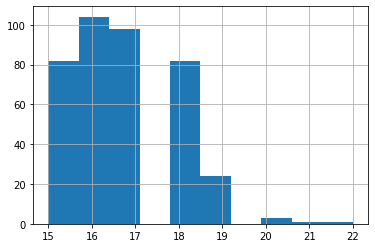

In [435]:
# Lets look at the numerical column 'age'
about_int('age')

In [436]:
# most students are 15-18 years old
# no emissions, all ages 15-22

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Missing values: 12


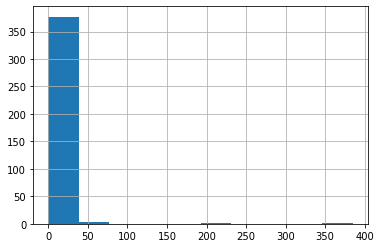

In [437]:
# Lets look at the numerical column 'absences'
about_int('absences')

In [438]:
# A little more than a quarter of students did not miss a single lesson 
# It is interesting, that many unique values in the number of passes are a multiple of 2, we can assume that study had consist of pairs.
# There are obvious emissions: 385 and 212, in connection with them our average is almost equal to 75 percent and a huge std
# There are many values in range up to 30. Value 30 will be the border of emmissions

In [439]:
# del emissions in 'absences'
stud_math['absences'] = stud_math['absences'].apply(lambda x: None if x>30 else x)

count    376.000000
mean       5.127660
std        5.854656
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       30.000000
Name: absences, dtype: float64

Border of emmissions is [0:30]


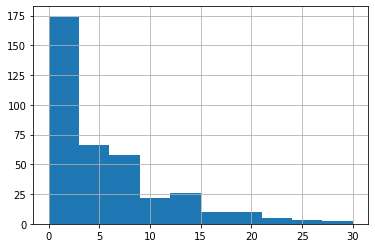

In [440]:
# Look again at 'absences'
display(stud_math['absences'].hist())
display(stud_math['absences'].describe())
print('Border of emmissions is [0:30]')

In [441]:
# Now we have adequate mean and std

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Missing values: 6


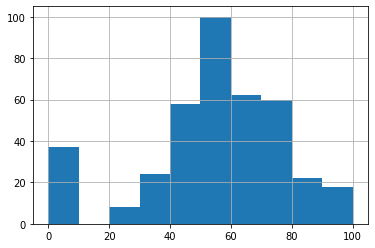

In [442]:
# Lets look at the numerical column 'score'. 
about_int('score')

In [443]:
# Interesting, there are 37 values = 0, apparently, this is the number of students, who did not attend the exam.
# The values are multiples of 5, which indicates to us that the minimum score for the completed task = 5
# Most values are in range [40:70] 

In [444]:
## Correlation analysis

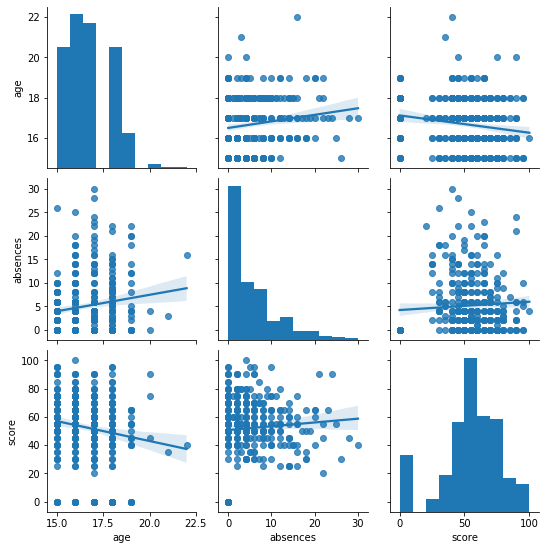

In [445]:
# Get coorelation plots for numerical columns
sns.pairplot(stud_math[int_col], kind = 'reg')

In [446]:
# Get the matrix of correlation
stud_math.corr()

,age,M_edu,F_edu,traveltime,studytime,failures,"studytime, granular",family_relationship,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.159546,0.081508,-0.015556,0.228047,0.015556,0.063539,0.029023,0.135107,-0.065946,0.150931,-0.155726
M_edu,-0.161704,1.000000,0.629956,-0.173515,0.078589,-0.245463,-0.078589,-0.020896,0.025335,0.064164,-0.045051,0.113094,0.213349
F_edu,-0.159546,0.629956,1.000000,-0.155459,0.008603,-0.271936,-0.008603,-0.035788,-0.021415,0.046581,0.022588,0.022108,0.130002
traveltime,0.081508,-0.173515,-0.155459,1.000000,-0.102206,0.064699,0.102206,-0.028220,-0.021937,0.037636,-0.021531,-0.016983,-0.070559
studytime,-0.015556,0.078589,0.008603,-0.102206,1.000000,-0.178992,-1.000000,0.028918,-0.121969,-0.051280,-0.080016,-0.090338,0.115741
failures,0.228047,-0.245463,-0.271936,0.064699,-0.178992,1.000000,0.178992,0.011942,0.098382,0.120914,0.081284,0.107234,-0.344338
"studytime, granular",0.015556,-0.078589,-0.008603,0.102206,-1.000000,0.178992,1.000000,-0.028918,0.121969,0.051280,0.080016,0.090338,-0.115741
family_relationship,0.063539,-0.020896,-0.035788,-0.028220,0.028918,0.011942,-0.028918,1.000000,0.164324,0.069241,0.097910,-0.084509,0.051219
freetime,0.029023,0.025335,-0.021415,-0.021937,-0.121969,0.098382,0.121969,0.164324,1.000000,0.296437,0.061575,0.026601,0.019026
goout,0.135107,0.064164,0.046581,0.037636,-0.051280,0.120914,0.051280,0.069241,0.296437,1.000000,-0.015608,0.120282,-0.129685


In [447]:
# 'studytime, granular' 100% correlates with 'studytime'. We can del 'studytime, granular'
stud_math.drop(['studytime, granular'], inplace = True, axis =1)
nom_col.remove(['studytime, granular',-12,-3])

In [448]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', data=stud_math, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

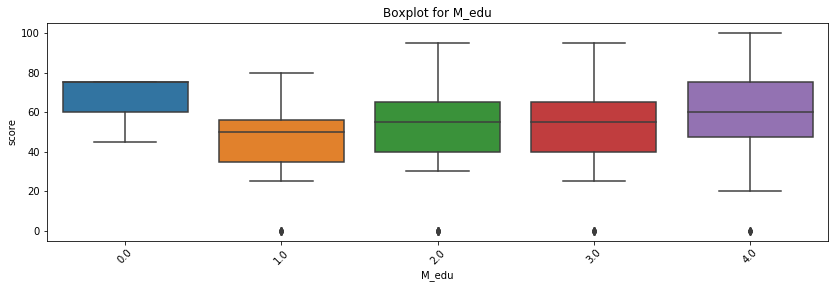

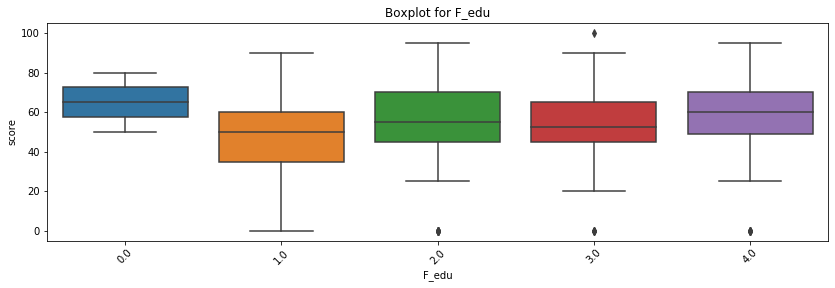

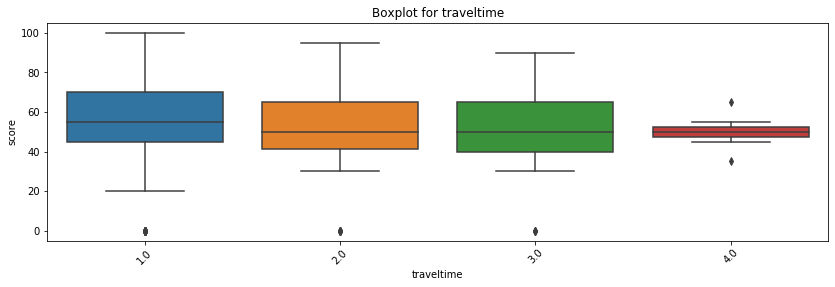

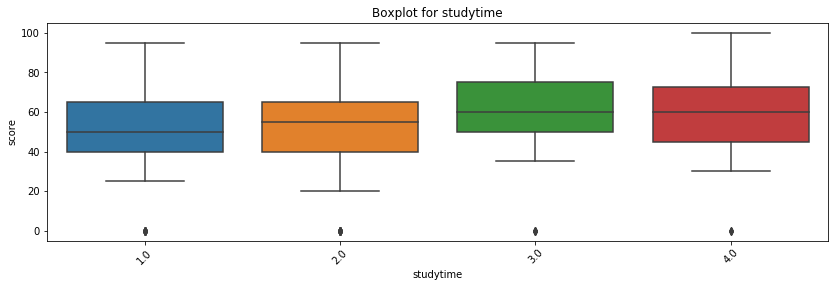

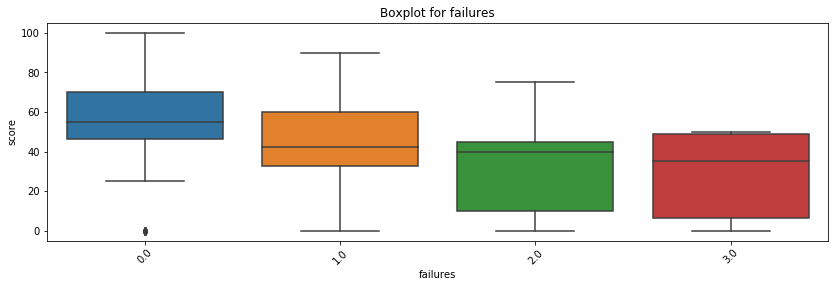

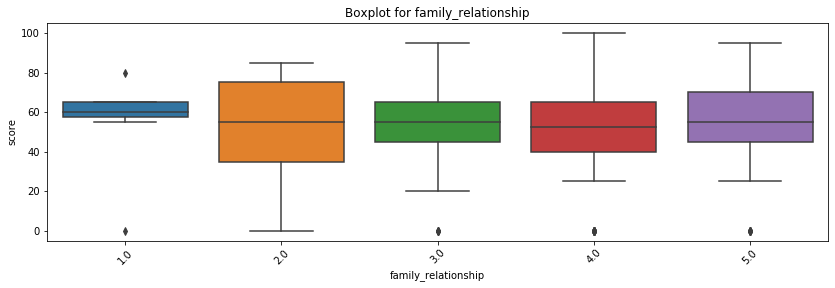

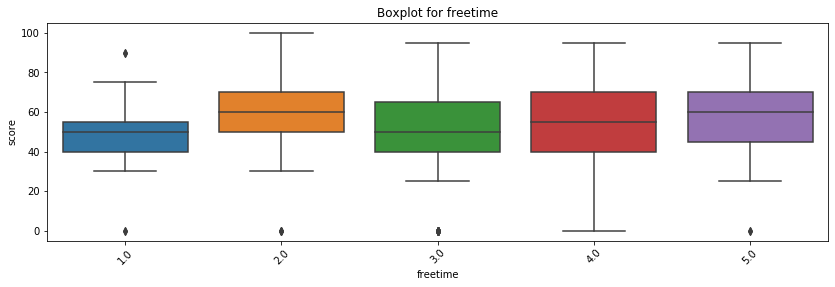

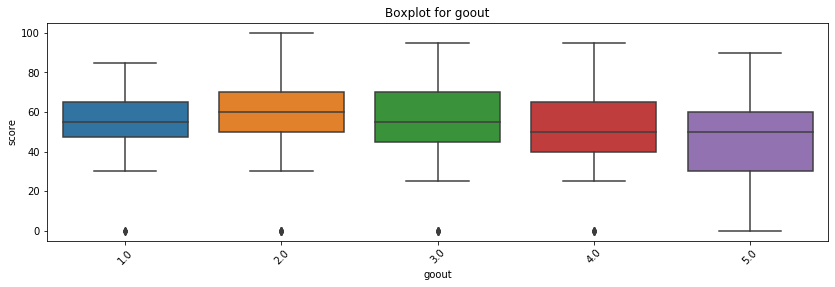

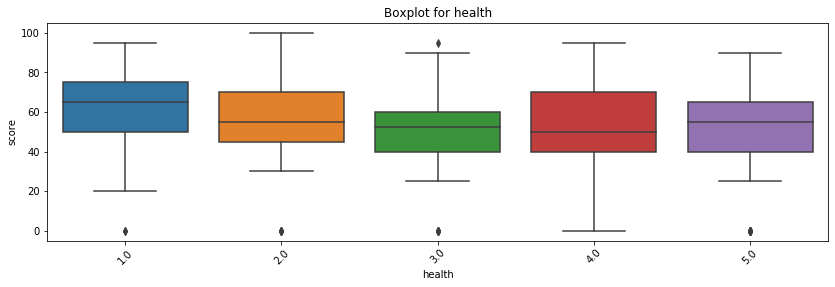

In [449]:
for col in nom_col:
    get_boxplot(col[0])

In [450]:
# Looking at the boxplots, all parameters can influence on score
# However, graphs are only an auxiliary tool, statistics can help to recognize the real significance of differences.
# Check there is a statistical difference in the distribution of grades by nominative criteria, using the Student's test.
# Let verify the null hypothesis that the distribution of students score by various parameters is indistinguishable:

In [451]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Bonferoni Amendment
            print('Statistically significant differences found for column', column)
            break

In [454]:
for col in nom_col:
    get_stat_dif(col[0])

In [453]:
for col in obj_col:
    get_stat_dif(col)

Statistically significant differences found for column M_job
